# Surfs Up!

In [1]:
# Python SQL toolkit and Object Relational Mapper
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

## Step 1 - Climate Analysis and Exploration

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
#Get a list of column names and types of 'measurement' table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [5]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [6]:
#Read 'measurement' table
data = pd.read_sql('SELECT * FROM measurement', conn)
data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [7]:
#Get a list of column names and types of 'station' table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [9]:
#Read 'station' table
data = pd.read_sql('SELECT * FROM station', conn)
data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


### Reflect and Query dates

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
#How many total dates in 'measurement' table?
session.query(func.count(Measurement.date)).all()

[(19550)]

In [14]:
#Earliest date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [15]:
#Latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

### Precipitation Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Latest date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [17]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.datetime.strptime('2017-08-23', '%Y-%m-%d') - dt.timedelta(days=364)
year_ago

datetime.datetime(2016, 8, 24, 0, 0)

In [18]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-24').all()
precipitation

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=['date', 'prcp'])
precipitation_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_df.sort_values(by='date', ascending=True)
precipitation_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


<Figure size 2160x1080 with 0 Axes>

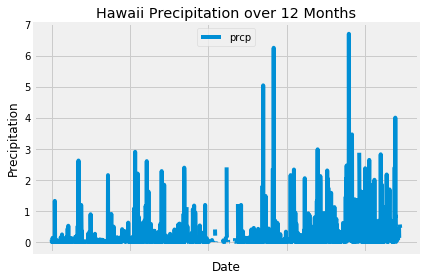

In [20]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(30,15))
precipitation_df.plot(title = "Hawaii Precipitation over 12 Months")
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [22]:
# Design a query to show how many stations are available in this dataset?
station_number = session.query(Measurement.station).distinct().count()
station_number

9

In [23]:
#Distinct 9 stations' name
stations = session.query(Station)
for station in stations:
    print(station.station)

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station))\
                .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
#The most active station
most_active_station = active_station[0]
print(f"Most Active Station: {most_active_station}")

Most Active Station: ('USC00519281', 2772)


In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
                                            .filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [27]:
low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f"Most Active Station ('USC00519281') Temperatures")
print(f"Low:{low}") 
print(f"High:{high}") 
print(f"Average:{avg}")  

Most Active Station ('USC00519281') Temperatures
Low:[(54.0,)]
High:[(85.0,)]
Average:[(71.66378066378067,)]


In [28]:
# Choose the station with the highest number of temperature observations.
highest_temp_station = session.query((Measurement.station), func.count(Measurement.tobs)).group_by(Measurement.station).\
                       order_by(func.count(Measurement.tobs).desc())
highest_temp_station[0][0]

'USC00519281'

In [29]:
# Query the last 12 months of temperature observation data for this station 
the_station_year_temp = session.query(Measurement.tobs).filter(Measurement.date > '2016-08-24')\
                        .filter(Measurement.station == 'USC00519281').all()

In [30]:
#Change the query results to DataFrame
the_station_year_temp_df = pd.DataFrame(the_station_year_temp, columns=['tobs']) 

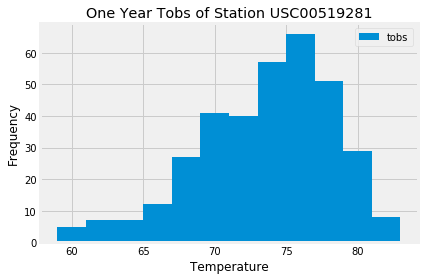

In [31]:
#Plot the 12 months of temperature observation of the station as a histogram
the_station_year_temp_df.plot.hist(bins=12, title='One Year Tobs of Station USC00519281')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Step 2 - Climate App

In [48]:
#Use FLASK to create your routes
from flask import Flask, jsonify
#Create an app
app = Flask(__name__)


#Home page
@app.route("/")
def home():
    return (f"Welcome to the Weather Information about Hawaii API!"
            f"All Available Routes:<br/>" 
            f"/api/v1.0/precipitation"
            f"/api/v1.0/stations"
            f"/api/v1.0/tobs"
            f"/api/v1.0/<start>"
            f"/api/v1.0/<start>/<end>")



@app.route("/api/v1.0/precipitation")
def precipitation():
    precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-24').all()
    
    prcp = []
    for results in precipitation:
        row = {"date":"prcp"}
        row["date"] = results[0]
        row["prcp"] = float(results[1])
    
    for precipitation in results:
        precipitation_dict = {}
        
        prcp.append(precipitation_dict)
   
    return jsonify(precipitation)   



@app.route("/api/v1.0/stations")
def stations():
    station_results = session.query(Stations.station, Station.station_name).group_by(Station.station).all()
    station_data = list[np.ravel(station_results)]
   
    return jsonify(station_data) 



@app.route("/api/v1.0/tobs")
def tobs():
    tobs_results = session.query(Measurements.station, Measurements.tobs).\
    filter(Measurements.date.between('2016-08-24', '2017-08-23')).all()
   
    tobs_data = []
    for tobs in tobs_results:
        tobs_dict = {}
        tobs_dict['station'] = tobs [0]
        tobs_dict['tobs'] = float(tobs[1])
        
        tobs_data.append(tobs_dict)
    
    return jsonify(tobs_data)



@app.route("/api/v1.0/<start>")
def calc_temps(start='start_date'):
    start_date = datetime.strptime('2016-08-24', '%Y-%m-%d').date()
    start_results = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs).\
                                  filter(Measurement.date >= start_date))
    
    start_tobs = []
    for tobs in start_results:
        tobs_dict['TMAX'] = float(tobs[0])
        tobs_dict['TMIN'] = float(tobs[1])
        tobs_dict['TAVG'] = float(tobs[2])
       
        start_tobs.append(tobs_dict)
        
    return jsonify(start_tobs)



@app.route("/api/v1.0/<start>/<end>")
def calc_temps1(start='start_date', end='end_date'):
    start_date = datetime.strptime('2016-08-24', '%Y-%m-%d').date()
    end_date = datetime.strptime('2017-08-23', '%Y-%m-%d').date()
    
    start_end_results = session.query(func.max(Measurement.tobs).label('max_tobs'), \
                                      func.min(Measurement.tobs).label('min_tobs'), \
                                      func.avg(Measurement.tobs).label('avg_tobs'). \
                                      filter(Measurement.date.between(start_date, end_date))
    
    
    start_end_tobs = []
    for tobs in start_end_results:
        tobs_dict = {}
        tobs_dict['TMAX']
        tobs_dict['TMIN']
        tobs_dict['TAVG']
        
        start_end_tobs.append(tobs_dict)
        
    return jsonify(start_end_tobs)



if __name__ == "__main__":
    app.run(debug=True)

SyntaxError: invalid syntax (<ipython-input-48-94736f67e6d4>, line 94)

## Optional: Other Recommended Analyses 

### Temperature Analysis

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temp = calc_temps('2017-08-04', '2017-08-14')   
trip_temp

[(71.0, 79.43181818181819, 84.0)]

In [34]:
#Change the query results to DataFrame
trip_temp_df = pd.DataFrame(trip_temp, columns=['tmin', 'tavg', 'tmax'])

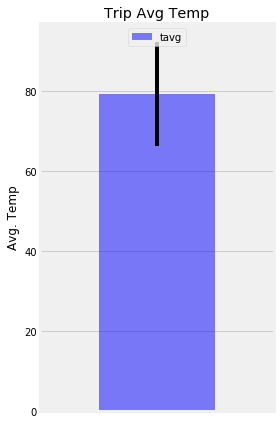

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# Create a list indicating where to write x labels and set figure size to adjust for space

trip_temp_df.plot.bar(y='tavg', yerr=(trip_temp_df['tmax']-trip_temp_df['tmin']), title = "Trip Avg Temp",\
                      color='b', alpha=0.5, figsize=(4,6))
plt.xticks(np.arange(1, 1.0))
plt.ylabel('Avg. Temp')
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

### Daily Rainfall Average Analysis

In [36]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def calc_prcp(start_date, end_date):
    
    #The total amount of rainfall per weather station for your trip dates
    
    #Args:
        #start_date (string): A date string in the format %Y-%m-%d
        #end_date (string): A date string in the format %Y-%m-%d
        
    #Returns:
        #prcp_amount, station name, latitude, longitude and elevation
        
    #Sort this in descending order by precipitation amount and list the station name, latitude, longitude, and elevation
    
    sel = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
    
    return session.query(*sel).filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).\
                               filter(Measurement.date <= end_date).group_by(Measurement.station).\
                               order_by(Measurement.prcp.desc()).all()

print(calc_prcp('2017-08-04', '2017-08-14'))

[('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]


In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
start_date = '2017-08-04'
end_date = '2017-08-14'

In [39]:
# Use the start and end date to create a range of dates
trip_date_range = session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
             group_by(Measurement.date).all()
trip_date_range

[('2017-08-04'),
 ('2017-08-05'),
 ('2017-08-06'),
 ('2017-08-07'),
 ('2017-08-08'),
 ('2017-08-09'),
 ('2017-08-10'),
 ('2017-08-11'),
 ('2017-08-12'),
 ('2017-08-13'),
 ('2017-08-14')]

In [40]:
#Change date_range as a list
trip_date_range_list = [x[0] for x in trip_date_range]
trip_date_range_list

['2017-08-04',
 '2017-08-05',
 '2017-08-06',
 '2017-08-07',
 '2017-08-08',
 '2017-08-09',
 '2017-08-10',
 '2017-08-11',
 '2017-08-12',
 '2017-08-13',
 '2017-08-14']

In [41]:
# Loop through the list of %m-%d strings
stripoff_y = [x[5: ] for x in trip_date_range_list]
stripoff_y

['08-04',
 '08-05',
 '08-06',
 '08-07',
 '08-08',
 '08-09',
 '08-10',
 '08-11',
 '08-12',
 '08-13',
 '08-14']

In [42]:
#Calculate the normals for each date: Use provided daily_normal query
def daily_normals(start_date, end_date):
   
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) >= start_date).\
                               filter(func.strftime("%m-%d", Measurement.date) <= end_date).\
                               group_by(func.strftime("%m-%d", Measurement.date)).all()
    
print(daily_normals('08-04', '08-14'))

[(69.0, 76.71153846153847, 84.0), (69.0, 76.14814814814815, 82.0), (67.0, 76.25, 83.0), (71.0, 77.15686274509804, 83.0), (68.0, 76.5576923076923, 83.0), (69.0, 75.98039215686275, 81.0), (65.0, 76.42, 83.0), (67.0, 75.98113207547169, 82.0), (67.0, 76.52727272727273, 83.0), (71.0, 76.98245614035088, 84.0), (71.0, 76.77777777777777, 82.0)]


In [43]:
# Load the previous query results into a Pandas DataFrame 
daily_normals_df = pd.DataFrame(daily_normals('08-04', '08-14'), columns=['tmin', 'tavg', 'tmax'])
daily_normals_df 

,tmin,tavg,tmax
0,69.0,76.711538,84.0
1,69.0,76.148148,82.0
2,67.0,76.250000,83.0
3,71.0,77.156863,83.0
4,68.0,76.557692,83.0
5,69.0,75.980392,81.0
6,65.0,76.420000,83.0
7,67.0,75.981132,82.0
8,67.0,76.527273,83.0
9,71.0,76.982456,84.0


In [44]:
#Add the `trip_dates` range as the `date` index
daily_normals_df['date'] = trip_date_range_list
daily_normals_df

,tmin,tavg,tmax,date
0,69.0,76.711538,84.0,2017-08-04
1,69.0,76.148148,82.0,2017-08-05
2,67.0,76.250000,83.0,2017-08-06
3,71.0,77.156863,83.0,2017-08-07
4,68.0,76.557692,83.0,2017-08-08
5,69.0,75.980392,81.0,2017-08-09
6,65.0,76.420000,83.0,2017-08-10
7,67.0,75.981132,82.0,2017-08-11
8,67.0,76.527273,83.0,2017-08-12
9,71.0,76.982456,84.0,2017-08-13


In [45]:
#Format the 'date' column
daily_normals_df['date'] = pd.to_datetime(daily_normals_df['date'], format='%Y-%m-%d')

In [46]:
#Make the 'date' column as index
daily_normals_df.set_index('date', inplace=True)
daily_normals_df

,tmin,tavg,tmax
date,,,
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0
2017-08-08,68.0,76.557692,83.0
2017-08-09,69.0,75.980392,81.0
2017-08-10,65.0,76.420000,83.0
2017-08-11,67.0,75.981132,82.0
2017-08-12,67.0,76.527273,83.0


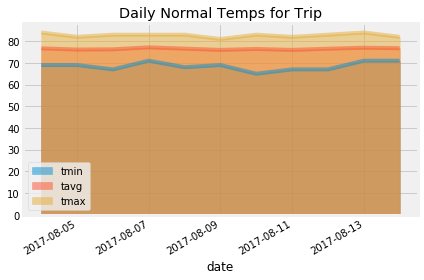

In [47]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_df.plot(kind='area', stacked=False, x_compat=True, title='Daily Normal Temps for Trip')
plt.tight_layout()
plt.show()